# Project Case: Boston Housing Data

## Author Stijn Tobias de Vries

In [1]:
#Import libraries
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
#Import dataset
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

##  Task 1: Familiarize yourself with the dataset

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per 10,000 dollars
# PTRATIO - pupil-teacher ratio by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in 1000's dollars

## Task 2: Generate basic statistics and visualizations for upper management.

[Text(0, 0.5, 'x $1000'),
 Text(0.5, 1.0, 'Median value of \nowner-occupied homes')]

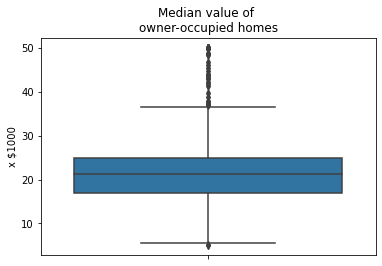

In [23]:
# For the "Median value of owner-occupied homes" provide a boxplot
# Owner-occupied homes: MEDV
ax = sns.boxplot(
    y="MEDV",
    data=boston_df
                )
ax.set(ylabel='x $1000',title='Median value of \nowner-occupied homes')

[0. 1.]


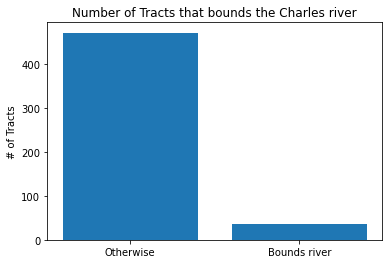

In [44]:
# Provide a bar plot for the Charles river variable
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
print(boston_df.CHAS.unique())

x = ['Otherwise','Bounds river']
y = boston_df.CHAS.value_counts()

pyplot.bar(x,y)
pyplot.ylabel('# of Tracts')
pyplot.title('Number of Tracts that bounds the Charles river')
pyplot.show()

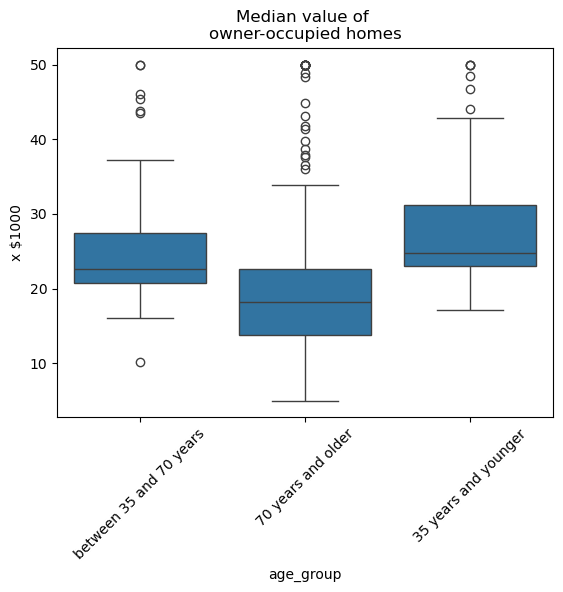

In [5]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 
# 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(
    x='age_group',
    y="MEDV",
    data=boston_df
                )
ax.set_title('Median value of \nowner-occupied homes')
ax.set_ylabel('x $1000')
ax.tick_params(axis='x', labelrotation=45)

Text(0.5, 1.0, 'The relationship between NOX concentrations \nand non-retail business acres per town')

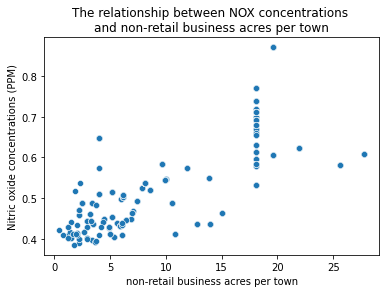

In [18]:
# Provide a scatter plot to show the relationship between 
# Nitric oxide concentrations and the proportion of non-retail business 
# acres per town. What can you say about the relationship?

# INDUS - proportion of non-retail business acres per town.
# NOX - nitric oxides concentration (parts per 10 million)

#seaborn.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, 
# style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, 
# size_order=None, size_norm=None, markers=True, style_order=None, 
# legend='auto', ax=None, **kwargs)

ax = sns.scatterplot(data=boston_df, x="INDUS",y="NOX")
ax.set_ylabel('Nitric oxide concentrations (PPM)')
ax.set_xlabel('non-retail business acres per town')
ax.set_title('The relationship between NOX concentrations \nand non-retail business acres per town')

I can say about the relationship, that there seems to be a positive correlation between NOX and INDUS

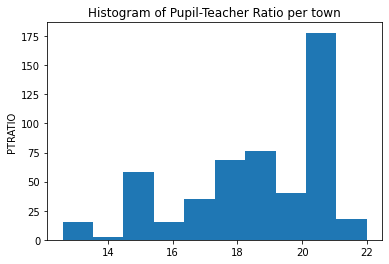

In [43]:
#Create a histogram for the pupil to teacher ratio variable
# PTRATIO - pupil-teacher ratio by town
pyplot.hist(boston_df[['PTRATIO']])
pyplot.ylabel('PTRATIO')
pyplot.title('Histogram of Pupil-Teacher Ratio per town')
pyplot.show()

## Task 3: Use the appropriate tests to answer the questions provided.¶

In [57]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? 
# (T-test for independent samples)
print("H_0: There is no difference in median value of houses bound by the Charles River and otherwise.\na=0.05\n\n")

print("Riverbound mean:",boston_df[boston_df['CHAS']==1]['MEDV'].mean(),"\nMean of Otherwise:",boston_df[boston_df['CHAS']==0]['MEDV'].mean())

print(scipy.stats.levene(
    boston_df[boston_df['CHAS']==0]['MEDV'],
    boston_df[boston_df['CHAS']==1]['MEDV'],
    center='mean'
    ),
    '\nThere are equal variances\n'
)
      
scipy.stats.ttest_ind(
    boston_df[boston_df['CHAS']==0]['MEDV'],
    boston_df[boston_df['CHAS']==1]['MEDV'], 
    equal_var = True)

H_0: There is no difference in median value of houses bound by the Charles River and otherwise.
a=0.05


Riverbound mean: 28.44 
Mean of Otherwise: 22.093842887473482
LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829) 
There are equal variances



Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

$H_0$ rejected, there is a significant difference.

In [7]:
# Is there a difference in Median values of houses (MEDV) for each 
# proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# H_0: There is no significant difference in MEDV for houses in 
# the three different age groups


#Make MEDV variables for the age groups
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']


# Perform ANOVA
f_statistic, p_value = scipy.stats.f_oneway(
    thirtyfive_lower, thirtyfive_seventy, seventy_older
)
# Print ANOVA
print(
    "F_statistic: {0}, P-value: {1}".format(f_statistic,p_value)
)

#Print conclusion
print(
    "\nThe P value is below alpha value 0.05, so we reject the H0.\n There is a significant difference of MEDV for houses in the different age groups."
)

F_statistic: 36.40764999196599, P-value: 1.7105011022702984e-15

The P value is below alpha value 0.05, so we reject the H0.
 There is a significant difference of MEDV for houses in the different age groups.


In [30]:
# Can we conclude that there is no relationship between Nitric oxide 
# concentrations and proportion of non-retail business acres per town? 
# (Pearson Correlation)

# H_0: There is no significant correlation between NOX concentration and 
# proportion of non-retail business acres per town

print(scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX']))

print(
    "\nThe P value is below alpha value 0.05, so we reject the H0.\n There is a significant correlation between NOX and proportion of non-retail business acres per town."
)

(0.7636514469209151, 7.913361061238693e-98)

The P value is below alpha value 0.05, so we reject the H0.
 There is a significant correlation between NOX and proportion of non-retail business acres per town.


In [38]:
# What is the impact of an additional weighted distance to the five 
# Boston employment centres on the median value of owner occupied homes? 
# (Regression analysis)

# H_0: There is no significant impact of the weighted distances to five 
# Boston employment centres, and the Median value of owner-occupied homes 
# in 1000's dollars

# DIS - weighted distances to five Boston employment centres
# MEDV - Median value of owner-occupied homes in 1000's dollars

Text(0.5, 1.0, 'The relationship between weighted distances to five Boston employment centres and \nMedian value of owner-occupied homes in 1000s dollars')

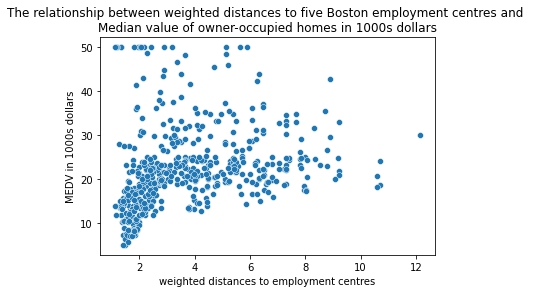

In [36]:
# First, print a scatter-plot to get an idea

ax = sns.scatterplot(data=boston_df, x="DIS",y="MEDV")
ax.set_ylabel('MEDV in 1000s dollars')
ax.set_xlabel('weighted distances to employment centres')
ax.set_title('The relationship between weighted distances to five Boston employment centres and \nMedian value of owner-occupied homes in 1000s dollars')

In [37]:

# X is the input variable (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## Add an intercept (beta_0) to our model
X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predictions=model.predict(X)

#Print out statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:48:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [45]:
print(
    "\nThe P value is below alpha value 0.05, so we reject the H0.\n\n There is a significant positive correlation between the weighted \ndistances to five Boston employment centres, and \nthe Median value of owner-occupied homes in 1000's dollars.\n\n The coëfficient is 1.09, meaning that the MEDV increases by \n1 (or a thousand dollars), per unit of weighed extra distance \nto an employment centre"
)


The P value is below alpha value 0.05, so we reject the H0.

 There is a significant positive correlation between the weighted 
distances to five Boston employment centres, and 
the Median value of owner-occupied homes in 1000's dollars.

 The coëfficient is 1.09, meaning that the MEDV increases by 
1 (or a thousand dollars), per unit of weighed extra distance 
to an employment centre
